In [88]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
!pip install seaborn==0.9.0
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
SEED = 20
np.random.seed = SEED

Requirement not upgraded as not directly required: seaborn==0.9.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: scipy>=0.14.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn==0.9.0)
Requirement not upgraded as not directly required: matplotlib>=1.4.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn==0.9.0)
Requirement not upgraded as not directly required: pandas>=0.15.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn==0.9.0)
Requirement not upgraded as not directly required: numpy>=1.9.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn==0.9.0)
Requirement not upgraded as not directly required: six>=1.10 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib>=1.4.3->seaborn==0.9.0)
Requirement not upgraded as not directly required: python-dateutil>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/si

In [47]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(uri)
change_map = {
    1 : 0,
    0 : 1
}
data['finished'] = data.unfinished.map(change_map)
data.head(10)

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


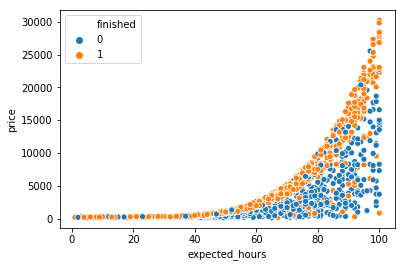

In [5]:
sns.scatterplot(x = 'expected_hours', y = 'price', data=data, hue="finished")

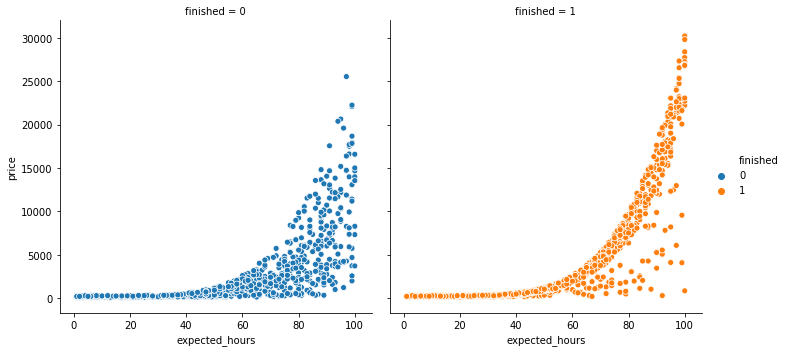

In [9]:
sns.relplot(x = 'expected_hours', y = 'price', data=data, col="finished", hue="finished")

In [11]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [82]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, train_size = 0.25, stratify=y)
model = LinearSVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts) * 100
print('Result %.2f%%' % accuracy)

Result 52.60%


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [83]:
baseline = np.ones(1618)
accuracy = accuracy_score(test_y, baseline) * 100
print('Baseline Result %.2f%%' % accuracy)

Baseline Result 52.60%


In [124]:
raw_train_x, raw_test_x, train_y, test_y =  train_test_split(x, y, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts) * 100
print('Result %.2f%%' % accuracy)


Result 67.59%
